Right now, this library can compute ECT only on graphs embedded in 2D

This tutorial has been created thanks to the tutorial published in: https://munchlab.github.io/ect/notebooks/Tutorial-ECT_for_embedded_graphs.html. There is another tutorial at https://munchlab.github.io/ect/notebooks/Tutorial-ECT_for_CW_Complexes.html where graphs have also 2 dimension simplex, that is faces. Because in this exact tutorial graphs only have vertex and edges, that is a typical graph.


First, we are going to import the needed functions and libraries.

In [1]:
from ect import ECT, EmbeddedGraph, create_example_graph

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Then, we have to create a graph, which has to be embedded in 2D. It is a restriction of the library, as it just work with graphs embedded in 2D.

<Axes: >

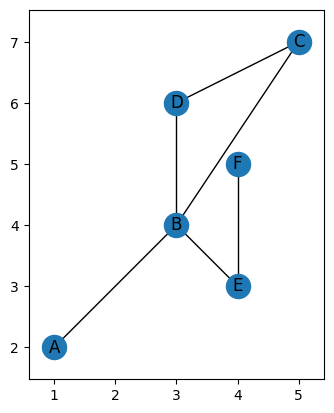

In [2]:
G = EmbeddedGraph()  # Note that this is the same graph that is returned by: G = create_example_graph()

G.add_node('A', 1, 2)
G.add_node('B', 3, 4)
G.add_node('C', 5, 7)
G.add_node('D', 3, 6)
G.add_node('E', 4, 3)
G.add_node('F', 4, 5)

G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('C', 'D')
G.add_edge('E', 'F')

G.plot()

We can access to the coordinates of the vertices:

In [3]:
G.coordinates

{'A': (1, 2), 'B': (3, 4), 'C': (5, 7), 'D': (3, 6), 'E': (4, 3), 'F': (4, 5)}

Then, the best is to have the graph centered, according the two axes, due to the rotational aspect of the ECT. Take note that this overwrite the coordinates of the points.

{'A': (np.float64(-2.0), np.float64(-2.5)), 'B': (np.float64(0.0), np.float64(-0.5)), 'C': (np.float64(2.0), np.float64(2.5)), 'D': (np.float64(0.0), np.float64(1.5)), 'E': (np.float64(1.0), np.float64(-1.5)), 'F': (np.float64(1.0), np.float64(0.5))}


<Axes: >

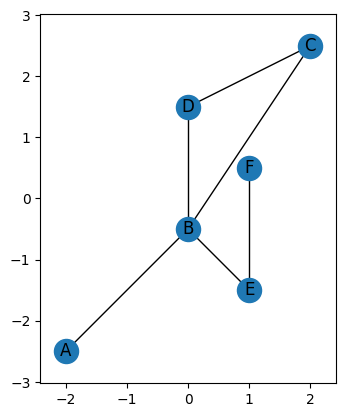

In [4]:
G.set_centered_coordinates(type="min_max")
print(G.coordinates)
G.plot()

You can also draw the bounding radius around the graph in order to see the $w$, where you can compute the ECC. Also you can rescale the graph to have it in unit radius. Take note that this overwrite also the coordinates of the points.

The radius of bounding circle centered at the origin is 1.0


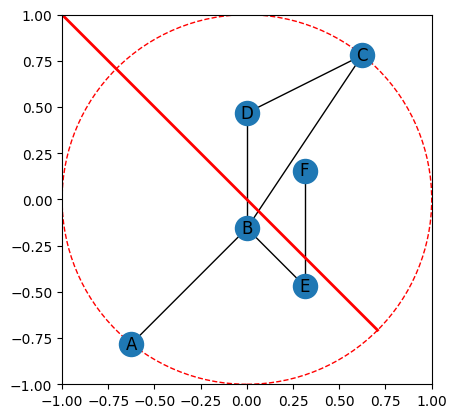

In [ ]:
G.rescale_to_unit_disk(preserve_center=False)
G.plot(bounding_circle=True)
r = G.get_bounding_radius() # you can do it previously to the rescale to unit disk.
print(f'The radius of bounding circle centered at the origin is {r}')

Now, suppose that you want to calculate the ecc for an specific direction $w$. First you have to see the filter value of each vertex in this case. We are going to see the direction in the bounding circle, the filter function, and the graph plotted with the vertices and its filter values(when it appears)

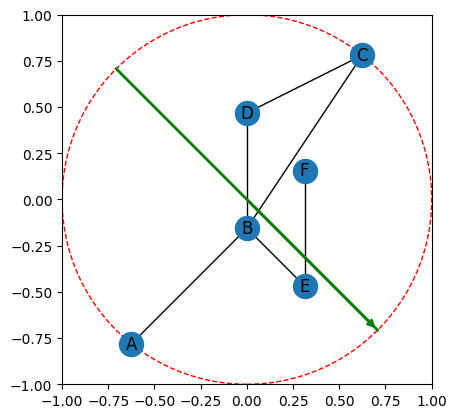

{'A': np.float64(0.11043152607484685), 'B': np.float64(0.11043152607484658), 'C': np.float64(-0.11043152607484685), 'D': np.float64(-0.3312945782245397), 'E': np.float64(0.5521576303742328), 'F': np.float64(0.11043152607484646)}


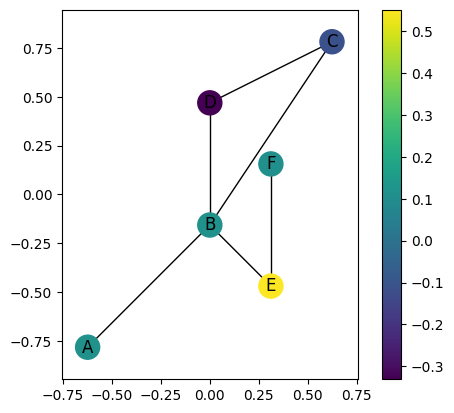

In [32]:
theta = 7 * np.pi / 4  
r = 1 

x_end = r * np.cos(theta)
y_end = r * np.sin(theta)
G.plot(bounding_circle=True)
plt.plot([-x_end, x_end], [-y_end, y_end], 'g-', linewidth=2, label=r'$\theta = \frac{7\pi}{4}$')
plt.annotate("", xy=(x_end, y_end), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", color="g", linewidth=2))
plt.show()
print(G.g_omega(theta = theta))
G.plot(color_nodes_theta=theta)
plt.show()


Next, calculate the specific ecc for a specific direction $w$. Take note that $w$ goes from [0,2*$\pi$]. 2*$\pi$ is equal to 6.28...

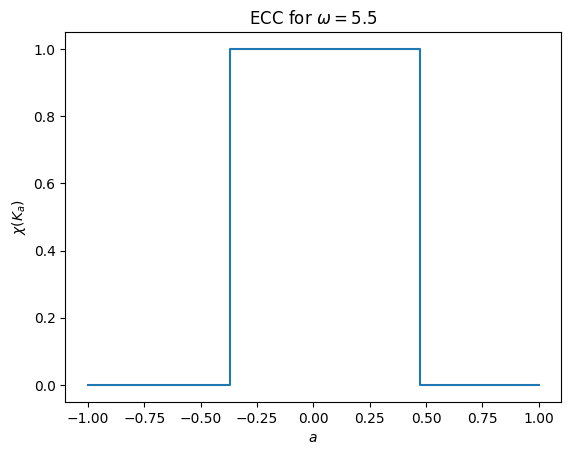

In [37]:
myect = ECT(num_dirs = 16, num_thresh=20)

myect.calculateECC(G, theta,bound_radius=True)
myect.plotECC(G, theta)

Finally, if we want to calculate the ECT. First we need to initialize the ect function and set the number of directions and threshold. Here it is called a, but it refers to us a t.

In [39]:
myect = ECT(num_dirs = 16, num_thresh=20)
print(f'Directions chosen are: {myect.thetas}')
# However, because a bounding radius hasn't been chosen yet, the thresholds are not yet set.
print(f'Thresholds chosen are: {myect.threshes}')
myect.set_bounding_radius(G.get_bounding_radius())
print(f'Internally set radius is: {myect.bound_radius}')
# Now the thresholds are set.
print(f'Thresholds chosen are: {myect.threshes}')

Directions chosen are: [0.         0.39269908 0.78539816 1.17809725 1.57079633 1.96349541
 2.35619449 2.74889357 3.14159265 3.53429174 3.92699082 4.3196899
 4.71238898 5.10508806 5.49778714 5.89048623]
Thresholds chosen are: None
Internally set radius is: 1.0
Thresholds chosen are: [-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


Compute ECT and plot it. Columns is direction and rows are thresholds.

(16, 20)
16 20


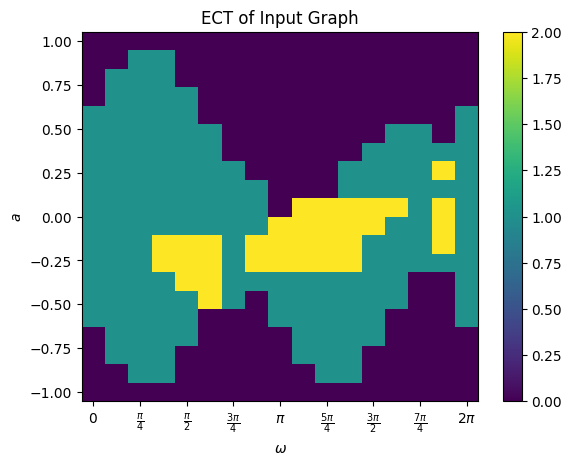

In [40]:
myect.calculateECT(G)
# The matrix is passed as an output above but is also saved internally. Get the saved matrix
M = myect.get_ECT()
print(M.shape)
print(myect.num_dirs, myect.num_thresh)
# We can use the built in command to plot the matrix. Unlike the plotECC function, this command does not calculate the ECT when called so it must have been run earlier. An equivalent command is myect.plotECT()
myect.plot('ECT')

If you want to compute its smooth version SECT:

(16, 20)


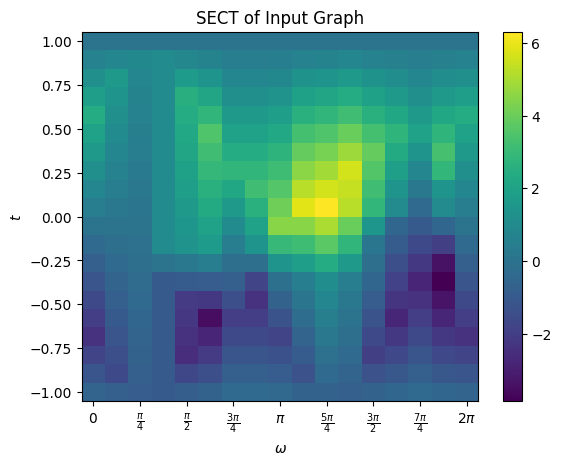

In [ ]:
myect.calculateECT(G, compute_SECT=True) # An alternative if you have set reviously compute_sect=False: M_SECT = myect.calculateSECT()
SECT = myect.get_SECT()
print(SECT.shape)
# We can use the built in command to plot the matrix. Unlike the plotECC function, this command does not calculate the ECT when called so it must have been run earlier. An equivalent command is myect.plotECT()
myect.plot('SECT')